# Microspecialization Project -> Bank Credit Approval

## Classification Algorithms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, StackingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
import itertools
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the Dataset

In [2]:
df = pd.read_excel('data.xlsx')
df.head()

,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,Variable_8,Variable_9,Variable_10,Variable_11,Variable_12,Variable_13,Variable_14,Target
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


## Preprocessing the Dataset

In [3]:
# Checking for Null Values
df.isnull().sum()

Variable_1     0
Variable_2     0
Variable_3     0
Variable_4     0
Variable_5     0
Variable_6     0
Variable_7     0
Variable_8     0
Variable_9     0
Variable_10    0
Variable_11    0
Variable_12    0
Variable_13    0
Variable_14    0
Target         0
dtype: int64

In [4]:
df.describe()

,Variable_1,Variable_2,Variable_3,Variable_4,Variable_5,Variable_6,Variable_7,Variable_8,Variable_9,Variable_10,Variable_11,Variable_12,Variable_13,Variable_14,Target
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


## Exploratory Data Analysis

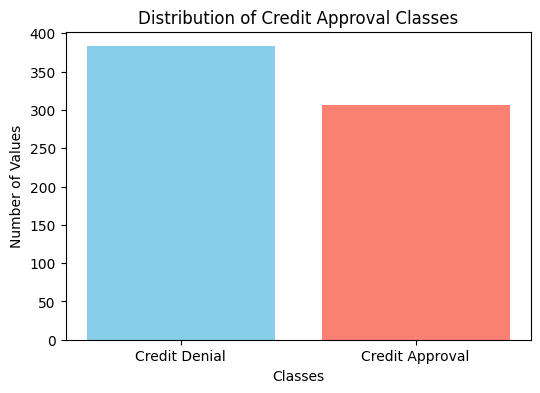

In [5]:
# Count the occurrences of each class
class_counts = df['Target'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon'])

# Add labels and title
plt.xticks([0, 1], ['Credit Denial', 'Credit Approval'])  # Setting the x-ticks to show class labels
plt.xlabel('Classes')
plt.ylabel('Number of Values')
plt.title('Distribution of Credit Approval Classes')

# Show plot
plt.show()

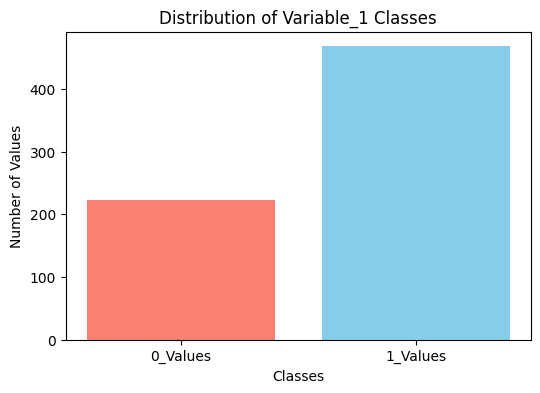

In [6]:
# Count the occurrences of each class of Variable 1
class_counts = df['Variable_1'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon'])

# Add labels and title
plt.xticks([0, 1], ['0_Values', '1_Values'])  # Setting the x-ticks to show class labels
plt.xlabel('Classes')
plt.ylabel('Number of Values')
plt.title('Distribution of Variable_1 Classes')

# Show plot
plt.show()

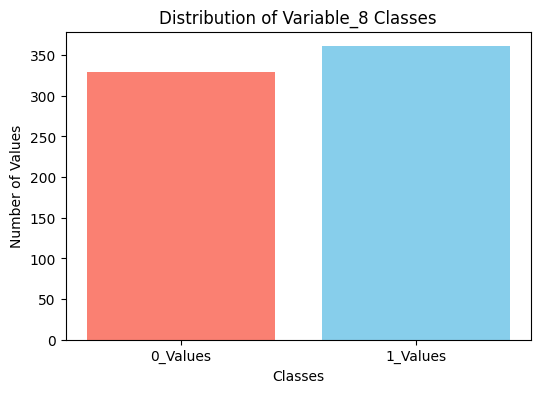

In [7]:
# Count the occurrences of each class of Variable 8
class_counts = df['Variable_8'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon'])

# Add labels and title
plt.xticks([0, 1], ['0_Values', '1_Values'])  # Setting the x-ticks to show class labels
plt.xlabel('Classes')
plt.ylabel('Number of Values')
plt.title('Distribution of Variable_8 Classes')

# Show plot
plt.show()

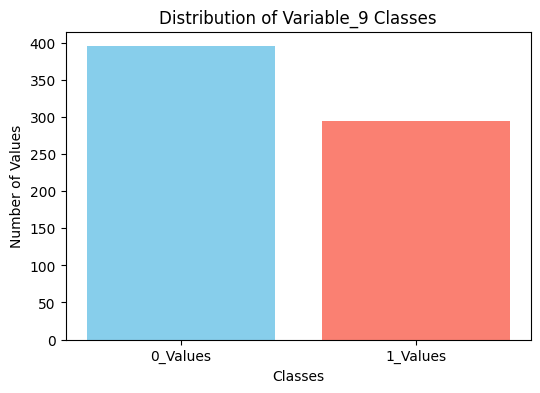

In [8]:
# Count the occurrences of each class of Variable 1
class_counts = df['Variable_9'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon'])

# Add labels and title
plt.xticks([0, 1], ['0_Values', '1_Values'])  # Setting the x-ticks to show class labels
plt.xlabel('Classes')
plt.ylabel('Number of Values')
plt.title('Distribution of Variable_9 Classes')

# Show plot
plt.show()

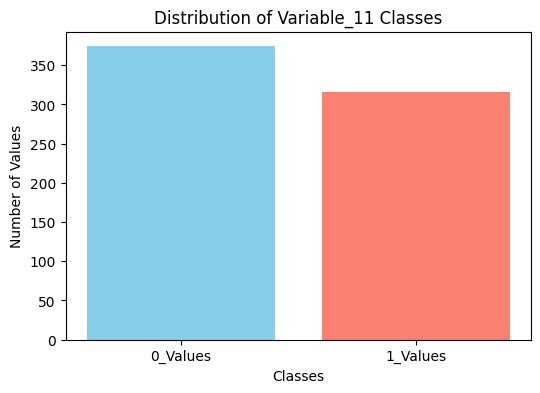

In [9]:
# Count the occurrences of each class of Variable 1
class_counts = df['Variable_11'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon'])

# Add labels and title
plt.xticks([0, 1], ['0_Values', '1_Values'])  # Setting the x-ticks to show class labels
plt.xlabel('Classes')
plt.ylabel('Number of Values')
plt.title('Distribution of Variable_11 Classes')

# Show plot
plt.show()

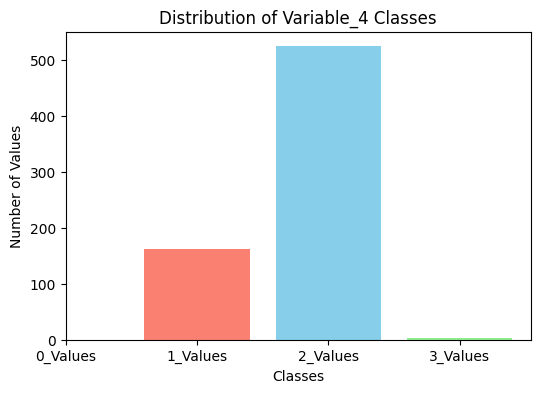

In [10]:
# Count the occurrences of each class of Variable 1
class_counts = df['Variable_4'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon', 'lightgreen', 'orange'])

# Add labels and title
plt.xticks([0, 1, 2, 3], ['0_Values', '1_Values', '2_Values', '3_Values'])  # Setting the x-ticks to show class labels
plt.xlabel('Classes')
plt.ylabel('Number of Values')
plt.title('Distribution of Variable_4 Classes')

# Show plot
plt.show()

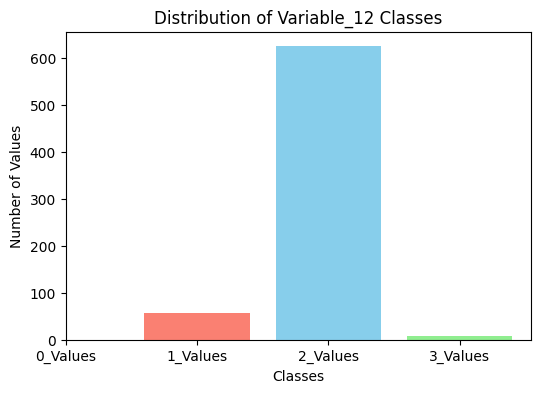

In [11]:
# Count the occurrences of each class of Variable 1
class_counts = df['Variable_12'].value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values, color=['skyblue', 'salmon', 'lightgreen', 'orange'])

# Add labels and title
plt.xticks([0, 1, 2, 3], ['0_Values', '1_Values', '2_Values', '3_Values'])  # Setting the x-ticks to show class labels
plt.xlabel('Classes')
plt.ylabel('Number of Values')
plt.title('Distribution of Variable_12 Classes')

# Show plot
plt.show()

## Correlation Matrix

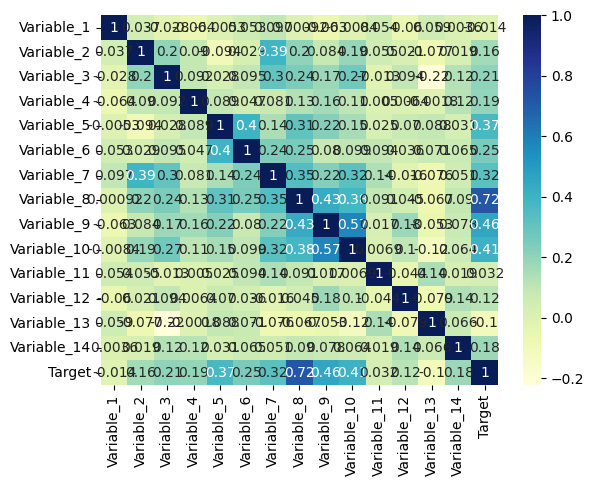

In [12]:
# Plotting correlation heatmap
dataplot = sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)

# Displaying heatmap
plt.show()

## Train Test Split

In [13]:
df.shape

(690, 15)

In [14]:
# Seperating the target value
X = df.values[:, 0:14]
y = df.values[:, 14]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (690, 14)
Shape of y: (690,)


In [15]:
# Splitting the dataset into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

## Decision Tree Classifier

In [16]:
# Function to perform training with Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=3,min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [17]:
y_pred = clf_entropy.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
[0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]


In [18]:
# Checking the Accuracy of the model
print("Accuracy is: ", accuracy_score(y_test, y_pred)*100)

Accuracy is:  82.6086956521739


## Ensemble Model for Combining Classification Models

In [19]:
log_reg = LogisticRegression(random_state=42)
dec_tree = DecisionTreeClassifier(random_state=42)
naive_bayes = GaussianNB()
random_forest = RandomForestClassifier(random_state=42)

In [20]:
print(X_train)

[[1.0000e+00 4.3080e+01 3.7500e-01 ... 2.0000e+00 3.0000e+02 1.6300e+02]
 [1.0000e+00 2.6000e+01 1.0000e+00 ... 2.0000e+00 2.8000e+02 1.0000e+00]
 [1.0000e+00 1.9170e+01 4.0000e+00 ... 2.0000e+00 3.6000e+02 1.0010e+03]
 ...
 [0.0000e+00 2.5170e+01 2.8750e+00 ... 2.0000e+00 3.6000e+02 1.0000e+00]
 [0.0000e+00 3.2170e+01 1.4600e+00 ... 2.0000e+00 1.2000e+02 2.0800e+03]
 [1.0000e+00 4.2080e+01 1.0400e+00 ... 2.0000e+00 5.0000e+02 1.0001e+04]]


In [21]:
# Create an ensemble model including Random Forest
ensemble_model= VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('dec_tree', dec_tree),
    ('naive_bayes', naive_bayes),
    ('random_forest', random_forest)
], voting='soft')

In [22]:
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg', LogisticRegression(random_state=42)),
                             ('dec_tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('naive_bayes', GaussianNB()),
                             ('random_forest',
                              RandomForestClassifier(random_state=42))],
                 voting='soft')

In [23]:
y_pred = ensemble_model.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
[0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.]


## Accuracy of the ensemble model

# Checking the Accuracy of the model

In [24]:
# Checking the Accuracy of the model
print("Accuracy is: ", accuracy_score(y_test, y_pred)*100)

Accuracy is:  87.43961352657004


## Combination of the Best 10 Variables

In [48]:
# List of independent variable names
variables = ["Variable_1", "Variable_2", "Variable_3", "Variable_4", "Variable_5", 
             "Variable_6", "Variable_7", "Variable_8", "Variable_9", "Variable_10", 
             "Variable_11", "Variable_12", "Variable_13", "Variable_14"]

# Generate all combinations of 10 variables from the 14 variables
combinations_of_variables = list(itertools.combinations(variables, 10))

In [54]:
# Initialize variables to store the best accuracy and corresponding variable set
best_accuracy = 0
best_variable_set = None

X_train_df = pd.DataFrame(X_train, columns=variables)
X_test_df = pd.DataFrame(X_test, columns=variables)

# Iterate over all combinations of 10 variables
for variable_combination in combinations_of_variables:
    # Create a temporary dataframe with the selected combination of variables
    X_train_subset = X_train_df[list(variable_combination)]
    X_test_subset = X_test_df[list(variable_combination)]
    
    # Train the ensemble model on the subset of variables
    ensemble_model.fit(X_train_subset, y_train)
    
    # Make predictions on the test set
    y_pred = ensemble_model.predict(X_test_subset)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Variables: {variable_combination}, Accuracy: {accuracy:.2f}%")
    
    # Check if the current accuracy is the best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_variable_set = variable_combination

Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_8', 'Variable_9', 'Variable_10'), Accuracy: 87.44%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_8', 'Variable_9', 'Variable_11'), Accuracy: 86.96%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_8', 'Variable_9', 'Variable_12'), Accuracy: 87.44%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_8', 'Variable_9', 'Variable_13'), Accuracy: 86.47%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_8', 'Variable_9', 'Variable_14'), Accuracy: 85.99%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_8', 'Variable_10', 'Varia

In [55]:
# Output the best set of variables and the corresponding accuracy
print("Best set of variables:", best_variable_set)
print("Best accuracy:", best_accuracy)

Best set of variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_8', 'Variable_10', 'Variable_11', 'Variable_12', 'Variable_13')
Best accuracy: 89.3719806763285


## Combination of 9 Best Variables

In [56]:
# Generate all combinations of 9 variables from the 14 variables
combinations_of_variables = list(itertools.combinations(variables, 9))

In [57]:
# Initialize variables to store the best accuracy and corresponding variable set
best_accuracy = 0
best_variable_set = None

X_train_df = pd.DataFrame(X_train, columns=variables)
X_test_df = pd.DataFrame(X_test, columns=variables)

# Iterate over all combinations of 10 variables
for variable_combination in combinations_of_variables:
    # Create a temporary dataframe with the selected combination of variables
    X_train_subset = X_train_df[list(variable_combination)]
    X_test_subset = X_test_df[list(variable_combination)]
    
    # Train the ensemble model on the subset of variables
    ensemble_model.fit(X_train_subset, y_train)
    
    # Make predictions on the test set
    y_pred = ensemble_model.predict(X_test_subset)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Variables: {variable_combination}, Accuracy: {accuracy:.2f}%")
    
    # Check if the current accuracy is the best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_variable_set = variable_combination

Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_8', 'Variable_9'), Accuracy: 86.96%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_8', 'Variable_10'), Accuracy: 85.99%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_8', 'Variable_11'), Accuracy: 87.44%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_8', 'Variable_12'), Accuracy: 87.44%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_8', 'Variable_13'), Accuracy: 86.96%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_8', 'Variable_14'), Accuracy: 85.02%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Vari

In [58]:
# Output the best set of variables and the corresponding accuracy
print("Best set of variables:", best_variable_set)
print("Best accuracy:", best_accuracy)

Best set of variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_8', 'Variable_9', 'Variable_10', 'Variable_13')
Best accuracy: 89.85507246376811


## Combination of the Best 8 Variables

In [59]:
# Generate all combinations of 8 variables from the 14 variables
combinations_of_variables = list(itertools.combinations(variables, 8))

In [60]:
# Initialize variables to store the best accuracy and corresponding variable set
best_accuracy = 0
best_variable_set = None

X_train_df = pd.DataFrame(X_train, columns=variables)
X_test_df = pd.DataFrame(X_test, columns=variables)

# Iterate over all combinations of 10 variables
for variable_combination in combinations_of_variables:
    # Create a temporary dataframe with the selected combination of variables
    X_train_subset = X_train_df[list(variable_combination)]
    X_test_subset = X_test_df[list(variable_combination)]
    
    # Train the ensemble model on the subset of variables
    ensemble_model.fit(X_train_subset, y_train)
    
    # Make predictions on the test set
    y_pred = ensemble_model.predict(X_test_subset)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Variables: {variable_combination}, Accuracy: {accuracy:.2f}%")
    
    # Check if the current accuracy is the best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_variable_set = variable_combination

Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_8'), Accuracy: 86.96%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_9'), Accuracy: 76.33%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_10'), Accuracy: 75.36%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_11'), Accuracy: 68.60%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_12'), Accuracy: 66.67%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_13'), Accuracy: 73.91%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_14'), Accuracy: 78.26%
V

In [61]:
# Output the best set of variables and the corresponding accuracy
print("Best set of variables:", best_variable_set)
print("Best accuracy:", best_accuracy)

Best set of variables: ('Variable_1', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_8', 'Variable_9', 'Variable_12')
Best accuracy: 89.85507246376811


## Combination of the Best 7 Variables

In [62]:
# Generate all combinations of 7 variables from the 14 variables
combinations_of_variables = list(itertools.combinations(variables, 7))

In [63]:
# Initialize variables to store the best accuracy and corresponding variable set
best_accuracy = 0
best_variable_set = None

X_train_df = pd.DataFrame(X_train, columns=variables)
X_test_df = pd.DataFrame(X_test, columns=variables)

# Iterate over all combinations of 10 variables
for variable_combination in combinations_of_variables:
    # Create a temporary dataframe with the selected combination of variables
    X_train_subset = X_train_df[list(variable_combination)]
    X_test_subset = X_test_df[list(variable_combination)]
    
    # Train the ensemble model on the subset of variables
    ensemble_model.fit(X_train_subset, y_train)
    
    # Make predictions on the test set
    y_pred = ensemble_model.predict(X_test_subset)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Variables: {variable_combination}, Accuracy: {accuracy:.2f}%")
    
    # Check if the current accuracy is the best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_variable_set = variable_combination

Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_7'), Accuracy: 68.60%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_8'), Accuracy: 85.02%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_9'), Accuracy: 74.40%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_10'), Accuracy: 73.91%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_11'), Accuracy: 67.15%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_12'), Accuracy: 66.67%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Variable_13'), Accuracy: 69.08%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6', 'Var

In [64]:
# Output the best set of variables and the corresponding accuracy
print("Best set of variables:", best_variable_set)
print("Best accuracy:", best_accuracy)

Best set of variables: ('Variable_2', 'Variable_3', 'Variable_5', 'Variable_8', 'Variable_10', 'Variable_13', 'Variable_14')
Best accuracy: 89.85507246376811


## Combination of the Best 6 Variables

In [65]:
# Generate all combinations of 6 variables from the 14 variables
combinations_of_variables = list(itertools.combinations(variables, 6))

In [66]:
# Initialize variables to store the best accuracy and corresponding variable set
best_accuracy = 0
best_variable_set = None

X_train_df = pd.DataFrame(X_train, columns=variables)
X_test_df = pd.DataFrame(X_test, columns=variables)

# Iterate over all combinations of 10 variables
for variable_combination in combinations_of_variables:
    # Create a temporary dataframe with the selected combination of variables
    X_train_subset = X_train_df[list(variable_combination)]
    X_test_subset = X_test_df[list(variable_combination)]
    
    # Train the ensemble model on the subset of variables
    ensemble_model.fit(X_train_subset, y_train)
    
    # Make predictions on the test set
    y_pred = ensemble_model.predict(X_test_subset)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Variables: {variable_combination}, Accuracy: {accuracy:.2f}%")
    
    # Check if the current accuracy is the best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_variable_set = variable_combination

Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6'), Accuracy: 67.63%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_7'), Accuracy: 67.63%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_8'), Accuracy: 85.99%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_9'), Accuracy: 75.36%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_10'), Accuracy: 73.91%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_11'), Accuracy: 65.70%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_12'), Accuracy: 64.73%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_13'), Accuracy: 66.18%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'V

In [67]:
# Output the best set of variables and the corresponding accuracy
print("Best set of variables:", best_variable_set)
print("Best accuracy:", best_accuracy)

Best set of variables: ('Variable_1', 'Variable_4', 'Variable_6', 'Variable_7', 'Variable_8', 'Variable_9')
Best accuracy: 89.85507246376811


## Combination of the Best 5 Variables

In [68]:
# Generate all combinations of 5 variables from the 14 variables
combinations_of_variables = list(itertools.combinations(variables, 5))

In [1]:
# Initialize variables to store the best accuracy and corresponding variable set
best_accuracy = 0
best_variable_set = None

X_train_df = pd.DataFrame(X_train, columns=variables)
X_test_df = pd.DataFrame(X_test, columns=variables)

# Iterate over all combinations of 10 variables
for variable_combination in combinations_of_variables:
    # Create a temporary dataframe with the selected combination of variables
    X_train_subset = X_train_df[list(variable_combination)]
    X_test_subset = X_test_df[list(variable_combination)]
    
    # Train the ensemble model on the subset of variables
    ensemble_model.fit(X_train_subset, y_train)
    
    # Make predictions on the test set
    y_pred = ensemble_model.predict(X_test_subset)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Variables: {variable_combination}, Accuracy: {accuracy:.2f}%")
    
    # Check if the current accuracy is the best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_variable_set = variable_combination

NameError: name 'pd' is not defined

In [70]:
# Output the best set of variables and the corresponding accuracy
print("Best set of variables:", best_variable_set)
print("Best accuracy:", best_accuracy)

Best set of variables: ('Variable_4', 'Variable_5', 'Variable_7', 'Variable_8', 'Variable_9')
Best accuracy: 89.3719806763285


## Minimizing Type I error by adjusting threshold

In [26]:
# Get predicted probabilities for the positive class (class 1) with the ensemble model
y_prob_updated = ensemble_model.predict_proba(X_test)[:, 1]
y_prob_updated

array([0.10391279, 0.50448289, 0.0182231 , 0.05601298, 0.05778957,
       0.95939614, 0.63523548, 0.1251969 , 0.95042631, 0.07545508,
       0.07031728, 0.71605195, 0.9488939 , 0.03025405, 0.72601649,
       0.02936109, 0.13029084, 0.98008594, 0.9065094 , 0.12153444,
       0.96613524, 0.10248487, 0.73541587, 0.51515796, 0.98892782,
       0.14673575, 0.86283134, 0.99200717, 0.0530244 , 0.9263274 ,
       0.11732146, 0.52915283, 0.02621055, 0.97350274, 0.99929487,
       0.70526579, 0.0728321 , 0.79512299, 0.6982948 , 0.01499174,
       0.87042054, 0.13522012, 0.55549408, 0.97737958, 0.09905819,
       0.09717194, 0.20647178, 0.02977856, 0.46035801, 0.74682824,
       0.12688686, 0.35258143, 0.96660521, 0.86639896, 0.43580153,
       0.12145599, 0.44717692, 0.98713058, 0.93823186, 0.13684845,
       0.91300521, 0.03353731, 0.32453515, 0.45272058, 0.95871217,
       0.12286392, 0.05573103, 0.94772036, 0.66258281, 0.55893964,
       0.95732958, 0.35882446, 0.66013134, 0.11128703, 0.04656

In [27]:
# Define a function to adjust cutoff and minimize Type I error
def adjust_threshold(y_prob, threshold):
    return np.where(y_prob >= threshold, 1, 0)

In [29]:
# Recalculate the best threshold to minimize Type I error
best_threshold = 0.5
min_type1_error = float('inf')

for threshold in np.arange(0.1, 0.9, 0.01):
    y_pred_custom = adjust_threshold(y_prob_updated, threshold)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_custom).ravel()
    
    # Type I error is the number of false positives (fp)
    type1_error = fp
    
    if type1_error < min_type1_error:
        min_type1_error = type1_error
        best_threshold = threshold

In [30]:
# Apply the best threshold and calculate the new accuracy
y_pred_best = adjust_threshold(y_prob_updated, best_threshold)
accuracy_best = accuracy_score(y_test, y_pred_best)

In [31]:
best_threshold, min_type1_error, accuracy_best

(0.7399999999999997, 1, 0.8309178743961353)

## Stacking Classifier

In [49]:
# Define the base models (same models used in your Voting Classifier)
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('lr', LogisticRegression()),
    ('nb', GaussianNB()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

In [50]:
# Define the meta-model (Logistic Regression used for combining predictions)
meta_model = LogisticRegression()

# Create the Stacking Classifier
stacking_model = StackingClassifier(
    estimators=estimators, 
    final_estimator=meta_model, 
    cv=5  # 5-fold cross-validation
)

In [51]:
# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred = stacking_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Stacking Classifier Accuracy: {accuracy:.2f}')

Stacking Classifier Accuracy: 0.86


## Combination of Best 6 Variables

In [52]:
# Generate all combinations of 6 variables from the 14 variables
combinations_of_variables = list(itertools.combinations(variables, 6))

In [53]:
# Initialize variables to store the best accuracy and corresponding variable set
best_accuracy = 0
best_variable_set = None

X_train_df = pd.DataFrame(X_train, columns=variables)
X_test_df = pd.DataFrame(X_test, columns=variables)

# Iterate over all combinations of 10 variables
for variable_combination in combinations_of_variables:
    # Create a temporary dataframe with the selected combination of variables
    X_train_subset = X_train_df[list(variable_combination)]
    X_test_subset = X_test_df[list(variable_combination)]

# Define Base Models for Stacking
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('lr', LogisticRegression()),
    ('nb', GaussianNB()),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Define the Meta-Model
meta_model = LogisticRegression()

# Initialize the Stacking Classifier
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_model,
    cv=5  # 5-fold cross-validation
)

# Iterate over all combinations of 10 variables
for variable_combination in combinations_of_variables:
    # Create a temporary dataframe with the selected combination of variables
    X_train_subset = X_train_df[list(variable_combination)]
    X_test_subset = X_test_df[list(variable_combination)]

    # Train the Stacking Classifier on the subset of variables
    stacking_model.fit(X_train_subset, y_train)

    # Make predictions on the test set
    y_pred = stacking_model.predict(X_test_subset)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Variables: {variable_combination}, Accuracy: {accuracy:.2f}%")

    # Check if the current accuracy is the best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_variable_set = variable_combination

# Display the best variable set and its accuracy
print(f"\nBest Variable Set: {best_variable_set}, Best Accuracy: {best_accuracy:.2f}%")

Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_6'), Accuracy: 69.57%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_7'), Accuracy: 70.05%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_8'), Accuracy: 85.02%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_9'), Accuracy: 76.81%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_10'), Accuracy: 77.78%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_11'), Accuracy: 68.60%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_12'), Accuracy: 66.18%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'Variable_13'), Accuracy: 72.46%
Variables: ('Variable_1', 'Variable_2', 'Variable_3', 'Variable_4', 'Variable_5', 'V

In [54]:
# Output the best set of variables and the corresponding accuracy
print("Best set of variables:", best_variable_set)
print("Best accuracy:", best_accuracy)

Best set of variables: ('Variable_1', 'Variable_5', 'Variable_6', 'Variable_7', 'Variable_8', 'Variable_9')
Best accuracy: 89.3719806763285
